![Astrofisica Computacional](../../../logo.png)

---
## Creation of Synthetic Data: signals+noise


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Synthetic Signal

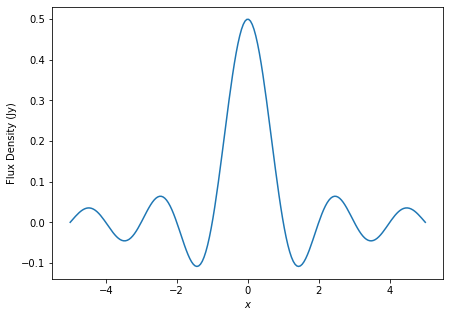

In [70]:
x = np.linspace(-5, 5, 200)
y = 0.5*np.sinc(x)

fig, ax = plt.subplots(figsize=(7,5))

ax.plot(x,y)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'Flux Density (Jy)')
plt.show()


Creation of 100 synthetic profiles using the above signal and adding random noise.

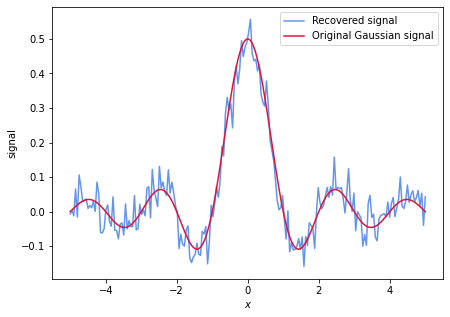

In [71]:
n = 100
rawprofiles = np.zeros([n,200])
for i in range(n):
  rawprofiles[i] = y + ( np.random.rand(200) - np.random.rand(200) )

recovered_signal = np.mean(rawprofiles, axis=0)

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x,recovered_signal, label='Recovered signal', color='cornflowerblue')
ax.plot(x,y, label='Original Gaussian signal', color='crimson')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'signal')
plt.legend()
plt.show()

In [72]:
rawprofiles[0]

array([-3.17193748e-02,  4.42010001e-01, -3.91599282e-01,  3.84852352e-01,
        6.62074815e-01,  4.89106235e-01, -6.35464194e-02,  3.78641657e-01,
        5.13515706e-01,  1.23244473e-01,  2.95432025e-01,  1.20386097e-01,
        2.41332980e-01, -3.80433994e-01,  2.91306497e-01, -1.50298907e-01,
       -2.64012133e-01, -1.88250586e-01,  2.26506088e-01, -4.06736601e-01,
        8.34470404e-02,  5.89551725e-01,  3.83741046e-01, -5.43470675e-01,
       -4.83357539e-01, -3.33226842e-01, -1.10250159e-01, -1.33086802e-01,
       -5.65815803e-01,  7.69425333e-01, -7.44417100e-02,  3.41164071e-01,
        3.99250688e-02,  7.31885586e-01, -2.06071056e-01, -1.07968445e-01,
        2.08260313e-01,  4.64904946e-01, -4.76252350e-01, -6.38269994e-01,
        1.17657427e-01, -6.33853258e-01, -1.46178725e-01,  1.23472959e-01,
        1.21458891e-01,  1.94914585e-01, -9.18540773e-03,  1.22796983e-01,
        1.01286798e-01,  7.25785989e-01,  1.29457016e-01, -1.59138414e-01,
        9.15226006e-01,  

Definition of an array with the x-coordinate and the synthetic data

In [73]:
raw1 = np.zeros([n+1,200])
raw1[0] = x
for i in range(n):
  raw1[i+1] = rawprofiles[i]
raw1

array([[-5.00000000e+00, -4.94974874e+00, -4.89949749e+00, ...,
         4.89949749e+00,  4.94974874e+00,  5.00000000e+00],
       [-3.17193748e-02,  4.42010001e-01, -3.91599282e-01, ...,
        -4.83311948e-03,  8.95082186e-03,  4.65872828e-03],
       [ 4.32186144e-02,  9.13579498e-01,  5.93322745e-01, ...,
        -2.02249609e-01, -5.87481376e-01,  2.13566139e-01],
       ...,
       [ 6.11719554e-01,  7.67042791e-02,  6.83006627e-01, ...,
        -7.05873409e-02,  3.99843731e-01,  1.65568241e-01],
       [-4.58278519e-01,  8.34786401e-02,  3.70520325e-01, ...,
         1.19665000e-01,  2.98553317e-01, -1.04311818e-01],
       [-5.95616245e-02,  7.69848446e-01, -4.84409273e-01, ...,
         2.13464173e-01,  9.47948774e-01, -1.71304741e-01]])

Definition of the transpose of the array to write data as columns

In [74]:
raw2 = np.transpose(raw1)
raw2

array([[-5.00000000e+00, -3.17193748e-02,  4.32186144e-02, ...,
         6.11719554e-01, -4.58278519e-01, -5.95616245e-02],
       [-4.94974874e+00,  4.42010001e-01,  9.13579498e-01, ...,
         7.67042791e-02,  8.34786401e-02,  7.69848446e-01],
       [-4.89949749e+00, -3.91599282e-01,  5.93322745e-01, ...,
         6.83006627e-01,  3.70520325e-01, -4.84409273e-01],
       ...,
       [ 4.89949749e+00, -4.83311948e-03, -2.02249609e-01, ...,
        -7.05873409e-02,  1.19665000e-01,  2.13464173e-01],
       [ 4.94974874e+00,  8.95082186e-03, -5.87481376e-01, ...,
         3.99843731e-01,  2.98553317e-01,  9.47948774e-01],
       [ 5.00000000e+00,  4.65872828e-03,  2.13566139e-01, ...,
         1.65568241e-01, -1.04311818e-01, -1.71304741e-01]])

Writting the file

In [76]:
np.savetxt('rawsignals.txt', raw2, fmt='%.10f', header='First column=x ; Following 100 columns=Raw flux data')